## Бутузов Олег  (ІСзп-71)

### Математична статистика - Розрахункова робота
### Варіант 2


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import json, sys
import scipy.stats as stats
import matplotlib.pyplot as plt

# Plot Settings
plt.style.use('seaborn')
plt.rcParams.update({ 'font.size': 24 }) 

def print_dict(dictionary):
    for descr, i in dictionary.items():
        print( "{: <18.5f} {}".format(i, descr) )
        
# print_dict({"book":0.1})

In [2]:
# Вибірка - Варіант "2"
df = pd.DataFrame({
    'N': [1, 1, 2, 1, 4, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 3, 0, 1, 1, 
          2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 3, 
          0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 3, 0, 2, 0, 2, 0, 3, 4, 1, 1, 
          1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 1, 
          1, 0, 1, 1, 3, 2, 1, 1, 0, 2, 0, 1, 4, 2, 3, 2 ]
})


# перевірка - довільний сет значень розподілений за Пуасоном
# df = pd.DataFrame({'N': list(np.random.poisson(1, 100))})
# df = pd.DataFrame({'N': list(np.random.binomial(5, 1.09/4, 100))})

### Варіаційний (дискретний або інтервальний) ряд вибірки

* [Статистичні ряди розподілу](https://uk.wikipedia.org/wiki/Статистичні_ряди_розподілу)

Статистичний ряд розподілу — впорядкований розподіл одиниць досліджуваної сукупності на групи за групувальною (варіативною) ознакою. Вони характеризують склад (структуру) досліджуваного явища, дозволяють судити про однорідність сукупності, межі її зміни, закономірності розвитку досліджуваного об'єкта. Залежно від ознаки статистичні ряди розподілу діляться на
- атрибутивні (якісні)
- варіаційні (кількісні)
  - дискретні
  - інтервальні

In [3]:
# Створює новий дата фрейм - на основі серії df['N'] з кількості елементів та кількості елемента в Серії
Ns = df['N'].value_counts().keys().tolist()
Fs = df['N'].value_counts().tolist()

# створюємо давайрейм з чисел та їх частоти
vardf = pd.DataFrame([( Ns[i], Fs[i] ) for i in range(len(Ns))], columns=["Xi", 'Ni'])
vardf.sort_values(by=['Xi'], inplace=True)
vardf.reset_index(inplace=True, drop=True)
vardf.head(10) # показати перші 5 елементів варіаційного ряду

,Xi,Ni
0,0,33
1,1,37
2,2,21
3,3,6
4,4,3


### 02 - Графічне зображення вибірки

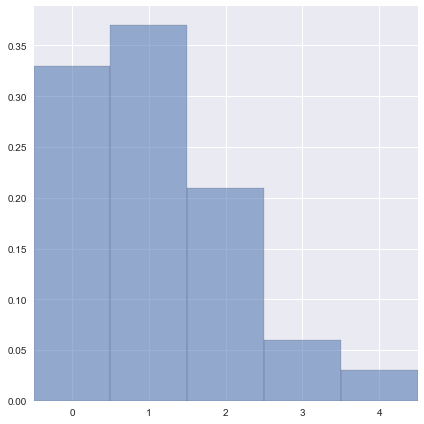

In [4]:
len_of_uniq_values=len(set(df['N'].sort_values().values.tolist()))

fig, ax = plt.subplots(figsize=(len_of_uniq_values+1,6))
ax.hist(
    df['N'].sort_values().values.tolist(), 
    bins=range(len_of_uniq_values+1), 
    density=True,  
    align="left",
    edgecolor='black', 
    linewidth=0.2, 
    alpha=0.55,
)
ax.set_xlim( 
    round(df['N'].min())-0.5, 
    round(df['N'].max())+0.5
)


fig.tight_layout()

### 03 - Eмпірична функція розподілу / Empirical Distribution Function

* [Empirical distribution function](https://en.wikipedia.org/wiki/Empirical_distribution_function)
Емпірична функція розподілу: $F^*(x)=\dfrac{n_x}{n}$

$n_x$ - число варіант менших від x, $n$ - обсяг вибірки

In [5]:
vardf['F(x)']=(vardf['Ni'].cumsum(axis=0)-vardf['Ni']) / df.size
vardf.head()

,Xi,Ni,F(x)
0,0,33,0.00
1,1,37,0.33
2,2,21,0.70
3,3,6,0.91
4,4,3,0.97


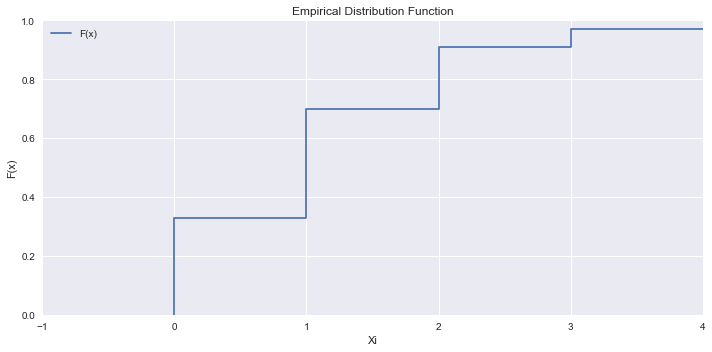

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("Empirical Distribution Function")
ax.set_xlim( 
    round(vardf['Xi'].min()) - 1, 
    round(vardf['Xi'].max())
)
ax.set_ylim(0, 1)
vardf.plot(x='Xi', y='F(x)', drawstyle="steps", ax=ax)
ax.set_ylabel("F(x)")
ax.set_xlabel("Xi")
fig.tight_layout()

###  04 - Значення вибіркової медіани, моди, асиметрії

 * https://en.wikipedia.org/wiki/Median_absolute_deviation 
 * https://en.wikipedia.org/wiki/Mode_(statistics)
 * https://en.wikipedia.org/wiki/Skewness

In [7]:
data = {
    # Медіана - центральний (n/2) або середнє центральних елементів вибірки
    'mediana' : df['N'].median(), 
    # Мода - число(а) що найчастіше зустрічається у вибіркі
    'moda'    : df['N'].mode(),
    # Центр розподілу / середнє
    'mean'    : df['N'].mean()
}

# json.dump(data, fp=sys.stdout, indent=4)

pd.DataFrame(list([[i] for i in data.values()]), 
             index=list([i for i in data.keys()]), 
             columns=['Значення'])


,Значення
mediana,1
moda,0 1 dtype: int64
mean,1.09


* `Модою` є значення що найчастіше зустрічається у вибіркі - у нашому випадку з частотою 37 таким числом є `1`
* `Медіаною` - є значення що зустрічається в середині виборки, або середнє значення середніх елементів (якщо кількість елементів у виборкі є парне число)
* `Ассиметрія` - це числова характеристика розподілу ймовірностей дійсної випадкової величини
* `Центром розподілу` є середнє значенння вибірки

* https://en.wikipedia.org/wiki/Bias_of_an_estimator
* https://en.wikipedia.org/wiki/Sample_mean_and_covariance
* https://uk.wikipedia.org/wiki/Стандартне_відхилення

In [8]:
distdf = df.groupby('N').size().to_frame(name = 'Total').reset_index()

distdf['CumSum'] = distdf['Total'].cumsum()
# середнє лінійне відххилення
distdf['D'] = abs( distdf['N'] - df['N'].mean() ) * distdf['Total']
# дисперсія
distdf['Deviation'] = ((distdf['N'] - df['N'].mean() )**2) * distdf['Total']

# відносна частота
distdf['Відносна чистота'] = distdf['Total'] /  distdf['Total'].sum()

# третій центральний момент
distdf['3rd_central_moment'] = ((distdf['N'] - df['N'].mean() )**3) * distdf['Відносна чистота']


distdf

,N,Total,CumSum,D,Deviation,Відносна чистота,3rd_central_moment
0,0,33,33,35.97,39.2073,0.33,-0.427360
1,1,37,70,3.33,0.2997,0.37,-0.000270
2,2,21,91,19.11,17.3901,0.21,0.158250
3,3,6,97,11.46,21.8886,0.06,0.418072
4,4,3,100,8.73,25.4043,0.03,0.739265


---

`Надалі дані будуть обчислені на основі цього датасету або використовуючи оригінальний датасет вибірки df`

---

#### Третій центральний момент

В теорії ймовірностей та математичній статистиці, центра́льний моме́нт k-го порядку випадкової величини з дійсними значеннями це величина

$$ M(X-MX)^{k} $$

де $M$ це математичне сподівання

* https://uk.wikipedia.org/wiki/Центральний_момент

$$ \mu_3 = \sum p_i * (X-\overline{X})^3 $$


In [9]:
distdf['3rd_central_moment'].sum()

0.8879579999999999

#### Коефіцієнт Асиметрії

Асиметрією $ \gamma _{1} $   (коефіцієнт асиметрії Фішера) теоретичного розподілу ймовірностей випадкової величини називають відношення центрального моменту третього порядку   $ \mu _{3} $ до куба середнього квадратичного відхилення $ \sigma ^{3} $ 

* https://uk.wikipedia.org/wiki/Коефіцієнт_асиметрії
* https://en.wikipedia.org/wiki/Skewness
* https://www.thoughtco.com/what-is-skewness-in-statistics-3126242

In [10]:
print_dict({
    'Dataframe' : distdf['3rd_central_moment'].sum() / df['N'].std(ddof=0)**3,
})

0.83494            Dataframe


### 05 - Незміщена оцінка математичного сподівання та дисперсії 

-----

#### Вибіркова дисперсія  (`Statistical Variance`)

* https://uk.wikipedia.org/wiki/Дисперсія_випадкової_величини

Дисперсія дозволяє виміряти наскільки далеко випадкові значення розподілені від їх середнього значення
Більші значення дисперсії свідчать про більші відхилення значень випадкової величини від центру розподілу.

$$var(x) = \dfrac{1}{n} \sum^n_{i=1}(X-\overline{X})^2$$

In [11]:
print_dict({
    'Dataframe' : distdf['Deviation'].sum()/distdf['Total'].sum(),
    'Original Distribution (variance method)' : df['N'].var(ddof=0)
})

1.04190            Dataframe
1.04190            Original Distribution (variance method)


#### Середнє лінійне відхилення

* https://stud.com.ua/20680/statistika/serednye_liniyne_vidhilennya

Показник розмаху варіації дає узагальнюючу характеристику тільки розмаху (амплітуді) значень ознаки, але не варіації відхилень. Розподіл відхилень можна вловити, исчислив відхилення всіх варіантів від середньої. Для того щоб дати їм узагальнюючу характеристику, необхідно обчислити середню з цих відхилень, тобто різниць між значеннями ознаки і середньої арифметичної в даній сукупності одиниць.

$$
D = \dfrac{1}{n} \sum ((Xi-\overline{X}) * \sum i)
$$

In [12]:
# звертаючись до данних нашого датасету
print_dict({
    'Dataframe' : distdf['D'].sum()/distdf['Total'].sum(), 
})

0.78600            Dataframe


---

#### Стандартне Відхилення (`Standard Deviation`)

Середнє квадратичне відхилення - показник розсіювання значень випадкової величини відносно її математичного сподівання, тобто відмінність кожногоелементу ряду від середнього, в нашому випадку це число 1.0207....

$$\sigma=\sqrt{var(x)}$$

In [13]:
print_dict({
    'Dataframe' : (distdf['Deviation'].sum()/distdf['Total'].sum())**.5,
    'Original Distribution (standard deviation method)' : df['N'].std(ddof=0)
})

1.02074            Dataframe
1.02074            Original Distribution (standard deviation method)


----

#### Незміщена оцінки дисперсії

$$var'(x) = \dfrac{1}{n-1} \sum^n_{i=1}(X-\overline{X})^2 $$

In [14]:
print_dict({
    'Dataframe' : (df['N'] - df['N'].mean()).pow(2).sum() /  (df.shape[0]-1),
    'Original Distribution (standard deviation method)' : df['N'].var(ddof=1),
})

1.05242            Dataframe
1.05242            Original Distribution (standard deviation method)


---

#### Не зміщена оцінка математичного сподівання дорівнює - самому математичному сподіванню

In [15]:
df['N'].mean()

1.09

----

#### Незміщене  / Виправлене середеє квадратичне відхилення

$$\sigma=\sqrt{var'(x)}$$

In [16]:
print_dict({
    'Dataframe' : ((df['N'] - df['N'].mean()).pow(2).sum() /  (df.shape[0]-1))**.5,
    'Original Distribution (standard deviation method)' : df['N'].std(ddof=1)
})

1.02588            Dataframe
1.02588            Original Distribution (standard deviation method)


---

#### Відносні показники варіації

* https://uk.wikipedia.org/wiki/Коефіцієнт_варіації
* https://en.wikipedia.org/wiki/Coefficient_of_variation
* https://en.wikipedia.org/wiki/Variance-to-mean_ratio


Відносна величина, що служить для характеристики коливання (мінливості) ознаки. Коефіцієнт варіації застосовується тоді, коли необхідно порівняти мінливість ознак об'єкта, які виражені в різних одиницях вимірювання>

$$ \nu=\dfrac{\sigma}{\bar{x}} = \dfrac{\text{standard deviation}}{mean} $$

Мінливість вважається:

* слабкою  ( $\nu \leq 10\%$ )
* середньою ( $10\%  < \nu  < 25\%$ )
* значною ( $\nu \geq 25\%$ )

при $\nu >70\%$ сукупніть наближається до грані неоднородності і дає нам змогу висунути гіпотезу про розподіл.

In [17]:
print_dict({
    'Variance to mean ratio' : df['N'].std(ddof=0) / df['N'].mean() 
})

0.93645            Variance to mean ratio


#### Лінійний коефіцієнт варіації / Відносне лінійне відхилення

Характеризує долю усередненого значення ознаки абсолютних коливань від середньої величини

$$
Kd=\dfrac{d}{\overline{x}}
$$

In [18]:
((distdf['D'].sum()/distdf['Total'].sum()) / df['N'].mean())*100

72.11009174311927

#### Коефіцієнт осциляції

Відношення - відносного коливання крайніх ознак навколо середньої.

$$
Kr=\dfrac{R}{\overline{x}}=\dfrac{x_{max}-x_{min}}{\overline{x}}
$$

In [19]:
( df['N'].max() - df['N'].min() ) / df['N'].mean()

3.6697247706422016

Великі значення стандартного відхилення означають, що точки можуть бути розподілені далеко від середнього, а малі значення стандартного відхилення означають, що точки зосереджені близько до середнього значення вибірки. Як ми бачимо, всі наші елементи знаходяться блязько до стандартнго відхилення, з чого ми можемо зробити висновок що елементи у виборці розподілені приблизно однаково.


### 06 - Гіпотеза про розподіл, за яким отримано вибірку

---
* https://uk.wikipedia.org/wiki/Розподіл_Пуассона

Усі величини знаходяться у діапазоні $[0, 4]$, відношення квадратичного відхилення до середнього значення наближається до `1` (`~0.93`), це дозволяє припустити що наш розподіл є Пуасонівським.

### 07 - Точкові оцінки параметрів гіпотетичного закону розподілу та перевірити їх властивості

* [Точкові статистичні оцінки параметрів генеральної сукупності](http://intranet.tdmu.edu.ua/data/kafedra/internal/informatika/lectures_stud/uk/med/biol/ptn/%D0%92%D0%B8%D1%89%D0%B0%20%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0/14.%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%BDi%20%20%D0%BE%D1%86i%D0%BD%D0%BA%D0%B8%20%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80i%D0%B2.htm)

Параметр $\lambda$ для випадкової величини дорівнює її дисперсії. Звідки ми можемо вивести ймовірність розподілу випадкової величини

$$p_xi(X=k)=\dfrac{\lambda^k}{k!}e^{-\lambda}$$

$$\lambda=\overline{x} \qquad S=\sqrt{var'(x)} $$


In [20]:
print_dict({
    'λ / mean' : df['N'].mean(),
    'S' : df['N'].std(ddof=1)
})

1.09000            λ / mean
1.02588            S


In [21]:
import math

def probability_poisson(row):
    actual = row.name
    mean = df['N'].mean()
    return math.exp(-mean) * mean**actual / math.factorial(actual)

p = df['N'].mean()/4
n = 4

# def probability(k):
#     return (p**k)*((1-n)**(n-k))

def probability_binominal(row):
    k = row.name
    mean = df['N'].mean()
    return (p**k)*((1-n)**(n-k))

poisson=df.groupby('N').size().to_frame(name = 'Total').reset_index()

probability=probability_binominal
# ймовірність
poisson['P_i'] = poisson.apply(probability, axis=1)

poisson

,N,Total,P_i
0,0,33,81.000000
1,1,37,-7.357500
2,2,21,0.668306
3,3,6,-0.060704
4,4,3,0.005514


### 08 - Перевірка за допомого Критерію Пірсона 

In [22]:
poisson['n*P_i'] = poisson['P_i'] * poisson['Total'].sum()
poisson['χ^2'] =  (poisson['Total']-poisson['n*P_i'])**2 / poisson['n*P_i']
poisson

,N,Total,P_i,n*P_i,χ^2
0,0,33,81.000000,8100.000000,8034.134444
1,1,37,-7.357500,-735.750000,-811.610686
2,2,21,0.668306,66.830625,31.429396
3,3,6,-0.060704,-6.070448,-24.000818
4,4,3,0.005514,0.551399,10.873516


In [23]:
# import math

# def probability1(k, mean):
#     return (math.exp(-mean) * (mean**k)) / math.factorial(k)

# def probability2(actual, mean): 
#     p = math.exp(-mean)
#     for i in range(actual):
#         p *= mean
#         p /= i+1
#     return p

# probability = probability1

# data = [33, 37, 21, 6, 3]

# print_dict({
#     0: (data[0] - sum(data)*probability(0, df['N'].mean()))**2 / (sum(data)*probability(0, df['N'].mean())),
#     1: (data[1] - sum(data)*probability(1, df['N'].mean()))**2 / (sum(data)*probability(1, df['N'].mean())),
#     2: (data[2] - sum(data)*probability(2, df['N'].mean()))**2 / (sum(data)*probability(2, df['N'].mean())),
#     3: (data[3] - sum(data)*probability(3, df['N'].mean()))**2 / (sum(data)*probability(3, df['N'].mean())),
#     4: (data[4] - sum(data)*probability(4, df['N'].mean()))**2 / (sum(data)*probability(4, df['N'].mean())),
# })


In [24]:
# ручний прорахунок для біномінального розподілу
# import math

# p = df['N'].mean()/4
# n = 4

# def probability(k):
#     return (p**k)*((1-n)**(n-k))



# # data = [33, 37, 21, 6, 3]

# print_dict({
#     0: (data[0] - sum(data)*probability(0))**2 / (sum(data)*probability(0)),
#     1: (data[1] - sum(data)*probability(1))**2 / (sum(data)*probability(1)),
#     2: (data[2] - sum(data)*probability(2))**2 / (sum(data)*probability(2)),
#     3: (data[3] - sum(data)*probability(3))**2 / (sum(data)*probability(3)),
#     4: (data[4] - sum(data)*probability(4))**2 / (sum(data)*probability(4)),
# })


In [23]:
# ксі квадрат
poisson['χ^2'].sum()

7240.825852582186

* [Критерій хі-квадрат](https://uk.wikipedia.org/wiki/Критерій_хі-квадрат)
* [Критерій узгодженості Пірсона](https://uk.wikipedia.org/wiki/Критерій_узгодженості_Пірсона)

Визначимо границю критичної області. Так статистики Пірсона вимірюють різницю між емпіричними і теоритичними розподілами, том чим більше ми спостерігаєме значення $K_{кр}$ (наближене), тим сильніше доводи проти основної гіпотези.

Тому критичною є правостороння область для цієї статистики $[K_{кр}; +\infty)$

Значення $K_{кр} = \chi^2(k-r-1;\alpha) $ знаходимо за [таблицею розподілу](http://statsoft.ru/home/textbook/modules/sttable.html) $\gamma^2$ і заданими значеннями $s$, k (число інтервалів) та  $r$ =1 ($\lambda$)


$$K_{кр}(.05; 3) = 7.81473$$

Оскільки $\sum K_i < K_{кр}(.05; 3)$ (0.814... < 7.81473), ми немаємо пирводів відкидати нашу гіпотезу. Тобто ми має право стверджувати, що розподіл з яким ми працюємо є розподілом Пуасона

### 09 - Довірчий інтервал для параметрів гіпотетичного закону розподілу

* http://yukhym.com/uk/vipadkovi-velichini/dovirchyi-interval-dlia-otsinky-z-nadiinistiu-0-95.html
* http://matecos.ru/formuly/formuly-i-tablitsy/tablitsa-laplasa.html


$$\gamma = 0.95 \Rightarrow 2\Phi(t_{\gamma}) = 0,95 \Leftrightarrow \Phi(t_{\gamma}) = 0,475 \Rightarrow t_{\gamma} = 1.96$$

#### Інтервал

$$ \overline{X} - \dfrac{\sigma}{\sqrt{n}} \times t_{\gamma} \qquad  \overline{X} + \dfrac{\sigma}{\sqrt{n}} \times t_{\gamma} $$

In [24]:
print( "X ∈ ", ( 
    df['N'].mean() - ( df['N'].std() / ( df['N'].size**0.5 ) )*1.96,
    df['N'].mean() + ( df['N'].std() / ( df['N'].size**0.5 ) )*1.96
))

X ∈  (0.8889280484578477, 1.2910719515421525)


`Тобто можна стверджувати що середне значення при вибіркі достатньо великого розміру не вийде за межі інтервалу 0.8889, 1.29107.`

#### Довірчий інтервал для середньо квадратичного

$$ S( 1 - q) < s < S(1 + q) $$

за таблицею

$$ q=q(γ ; n)=(0.95; 100)=0.143$$

In [25]:
print( "S ∈ ", ( 
    df['N'].std(ddof=1)*(1-0.143),
    df['N'].std(ddof=1)*(1+0.143)
))

S ∈  (0.8791768493450237, 1.1725777582279604)
